<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/Autoencoder_for_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data

In [0]:
from sklearn.datasets import make_blobs

In [0]:
data = make_blobs(n_samples=1000, n_features=3,centers=5,random_state=101)

## Scale the Data

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[0])

In [0]:
# data[0] 
data_x = scaled_data[:,0]
data_y = scaled_data[:,1]
data_z = scaled_data[:,2]

In [0]:
from mpl_toolkits.mplot3d import Axes3D

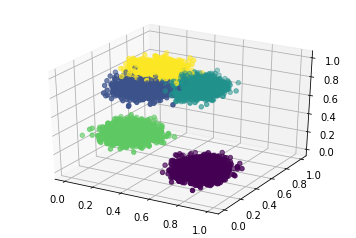

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data_x,data_y,data_z,c=data[1])

# The Linear Autoencoder

In [0]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

In [0]:
num_inputs = 3  # 3 dimensional input
num_hidden = 2  # 2 dimensional representation 
num_outputs = num_inputs # Must be true for an autoencoder!

learning_rate = 0.01

### Placeholder

Notice there is no real label here, just X.

In [0]:
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

### Layers

Using the fully_connected layers API, we **do not** provide an activation function!

In [0]:
hidden = fully_connected(X, num_hidden, activation_fn=None)
outputs = fully_connected(hidden, num_outputs, activation_fn=None)

### Loss Function

In [0]:
loss = tf.reduce_mean(tf.square(outputs - X))  # MSE

### Optimizer

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate)
train  = optimizer.minimize( loss)

### Init

In [0]:
init = tf.global_variables_initializer()

## Running the Session

In [0]:
num_steps = 1000

with tf.Session() as sess:
    sess.run(init)
    
    for iteration in range(num_steps):
        sess.run(train,feed_dict={X: scaled_data})

        
    # Now ask for the hidden layer output (the 2 dimensional output)
    output_2d = hidden.eval(feed_dict={X: scaled_data})

In [0]:
output_2d.shape

(10000, 2)

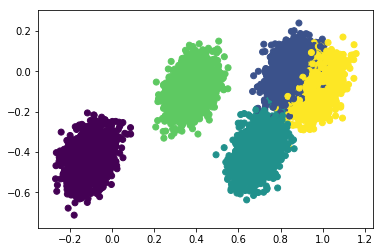

In [0]:
plt.scatter(output_2d[:,0],output_2d[:,1],c=data[1])